In [522]:
#!g1.1
%pip install seaborn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 293 kB 3.3 MB/s            
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [554]:
#!g1.1
# from sklearn.metrics import roc_auc_score

# Load predicted data and actual targets into dataframes
# pr_d = pd.read_csv('/home/jupyter/mnt/s3/main-data/dataset/1sentencenewtest.csv')
data = pd.read_csv('/home/jupyter/mnt/s3/main-data/dataset/train.csv')
# predicted_data = pd.read_csv('predicted_data.csv')
# actual_data = pd.read_csv('actual_data.csv')
data1 = pd.DataFrame()
data1_predicted = []
data1_sentiment = []
# print(data.head())
# data.shape[0]
for i in reversed(range(1, data.shape[0])):
    res = predicted(data['sentence'][i])
    data1_predicted.append(rate(res))
    data1_sentiment.append(data['sentiment'][i])
#     print(rate(res), data['sentiment'][i])
    if i == int(data.shape[0]*0.8-1):
        break
# data1.to_csv('/home/jupyter/mnt/s3/main-data/dataset/train_rocauc.csv')
# data1_sentiment
# Prepare actual target labels as an array
# y_true = actual_data['sentiment'].values

# # Compute ROC-AUC score
# roc_auc = roc_auc_score(y_true, predicted_data['predicted_score'])
# print('ROC-AUC score:', roc_auc)


['−',
 '+',
 '+',
 '−',
 '−',
 '−',
 '+',
 '−',
 '−',
 '+',
 '−',
 '−',
 '−',
 '+',
 '−',
 '−',
 '−',
 '−',
 '+',
 '+',
 '+',
 '?',
 '−',
 '−',
 '−',
 '+',
 '−',
 '−',
 '−',
 '−',
 '+',
 '−',
 '−',
 '−',
 '?',
 '−',
 '?',
 '−',
 '−',
 '−',
 '−',
 '−',
 '−',
 '+',
 '−',
 '+',
 '?',
 '−',
 '−',
 '−',
 '−',
 '−',
 '−',
 '−',
 '?',
 '+',
 '+',
 '−',
 '−',
 '−',
 '+',
 '+',
 '+',
 '+',
 '+',
 '−',
 '−',
 '−',
 '−',
 '−',
 '−',
 '+',
 '−',
 '−',
 '+',
 '+',
 '?',
 '+',
 '−',
 '−',
 '−',
 '−',
 '−',
 '−',
 '−',
 '−',
 '?',
 '−',
 '?',
 '?',
 '−',
 '+',
 '−',
 '+',
 '−',
 '+',
 '−',
 '+',
 '?',
 '+',
 '−',
 '−',
 '+',
 '?',
 '?',
 '+',
 '+',
 '−',
 '+',
 '−',
 '+',
 '+',
 '+',
 '?',
 '+',
 '?',
 '+',
 '−',
 '+',
 '?',
 '+',
 '−',
 '−',
 '−',
 '+',
 '−',
 '−',
 '?',
 '+',
 '−',
 '−',
 '−',
 '−',
 '?',
 '−',
 '+',
 '−',
 '?',
 '+',
 '+',
 '−',
 '−',
 '−',
 '−',
 '+',
 '?',
 '+',
 '−',
 '−',
 '−',
 '+',
 '−',
 '−',
 '−',
 '+',
 '?',
 '+',
 '?',
 '+',
 '+',
 '−',
 '−',
 '−',
 '+',
 '+',
 '−',
 '−'

In [587]:
#!g1.1
# roc_auc = roc_auc_score(data1_sentiment, data1_predicted)
# print('ROC-AUC score:', roc_auc)
# y_pred = [1 if x == '+' else 0 for x in data1_predicted]
y_true = [1 if x == '+' else 0 for x in data1_sentiment]

# # Compute ROC AUC score
# roc_auc = roc_auc_score(y_true_binary, y_pred_binary)

# print("ROC AUC score:", roc_auc)
mapping = {'+': 1.0, '−': 0.0, '?': 0.5}
# y_true = [1 if x == '+' else 0 for x in data1_sentiment]


# Convert the true and predicted values to binary labels
y_true = [mapping[label] for label in data1_sentiment]
y_pred = [mapping[label] for label in data1_predicted]
# print(y_pred)
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_true, y_pred, average=None)

print('ROC AUC score:', roc_auc)

ValueError: continuous format is not supported

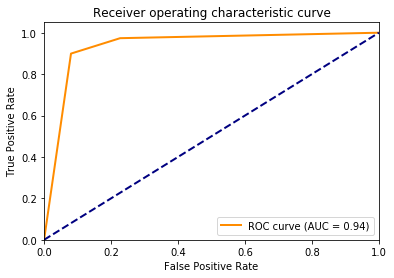

In [578]:
#!g1.1
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred, drop_intermediate=True)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#!g1.1
